<a href="https://colab.research.google.com/github/anggaangoro3/data-science-project/blob/main/Tanah_Jakarta_Row_Sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [594]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [595]:
"""
import pandas as pd
import glob
import os

# --- 1. TENTUKAN "CETAKAN" KOLOM ANDA ---
# Ini adalah 13 kolom yang ingin ANDA simpan.
# Kolom lain (seperti 'web_scraper_order') akan dibuang.
master_columns = [
    'Product_sku_0',
    'Place_name_0',
    'Total_Price_0',
    'Price_per_meter_0',
    'Land_Area_0',
    'Certificate_0',
    'Land_Dimensions_0',
    'Property_Type_0',
    'Ad_Type_0',
    'Place_PostalAddress_addressLocality_0',
    'BreadcrumbList_ListItem_name_2',
    'BreadcrumbList_ListItem_name_3',
    'Product_description_0'
]

# Nama file untuk hasil akhir
output_filename = "GABUNGAN_FINAL_DATASET.csv"

# Daftar untuk menampung semua DataFrame yang sudah bersih
all_dataframes = []

# --- 2. CARI SEMUA FILE CSV ---
# Ini akan menemukan semua file yang berakhiran .csv di folder yang ditentukan
csv_files = glob.glob("/content/drive/MyDrive/Rumah123_dataset/*.csv")

print(f"Ditemukan {len(csv_files)} file CSV. Memulai proses penggabungan...")

# --- 3. LOOPING, BERSIHKAN, DAN KUMPULKAN ---
for file in csv_files:

    # PENTING: Lewati file output itu sendiri jika skrip dijalankan 2x (meskipun file output sekarang ada di folder yang sama)
    if os.path.basename(file) == output_filename:
        print(f"--- Melewati file output '{file}' ---")
        continue

    print(f"Memproses file: {file}...")
    try:
        # Buka file CSV
        temp_df = pd.read_csv(file)

        # --- INI ADALAH KUNCINYA ---
        # Terapkan "cetakan" kolom.
        # Kolom ekstra akan dibuang, kolom yang hilang akan jadi NaN.
        temp_df_cleaned = temp_df.reindex(columns=master_columns)

        # Tambahkan DataFrame bersih ke daftar
        all_dataframes.append(temp_df_cleaned)

    except pd.errors.EmptyDataError:
        print(f"--- Peringatan: File '{file}' kosong dan akan dilewati. ---")
    except Exception as e:
        print(f"--- Gagal memproses file '{file}'. Error: {e} ---")

# --- 4. GABUNGKAN SEMUA ---
if not all_dataframes:
    print("Tidak ada data untuk digabungkan. Selesai.")
else:
    print("\nMenggabungkan semua data yang telah dibersihkan...")

    # Gabungkan semua DataFrame di dalam daftar menjadi SATU
    final_df = pd.concat(all_dataframes, ignore_index=True)

    # 5. Simpan hasil akhir
    # Simpan file output di lokasi yang sama dengan file input
    output_path = os.path.join("/content/drive/MyDrive/Rumah123_dataset", output_filename)
    final_df.to_csv(output_path, index=False)

    print(f"\n--- BERHASIL ---")
    print(f"Total {len(all_dataframes)} file telah digabungkan.")
    print(f"Total baris data gabungan: {len(final_df)}")
    print(f"Hasil disimpan di: {output_path}")
    """

'\nimport pandas as pd\nimport glob\nimport os\n\n# --- 1. TENTUKAN "CETAKAN" KOLOM ANDA ---\n# Ini adalah 13 kolom yang ingin ANDA simpan.\n# Kolom lain (seperti \'web_scraper_order\') akan dibuang.\nmaster_columns = [\n    \'Product_sku_0\',\n    \'Place_name_0\',\n    \'Total_Price_0\',\n    \'Price_per_meter_0\',\n    \'Land_Area_0\',\n    \'Certificate_0\',\n    \'Land_Dimensions_0\',\n    \'Property_Type_0\',\n    \'Ad_Type_0\',\n    \'Place_PostalAddress_addressLocality_0\',\n    \'BreadcrumbList_ListItem_name_2\',\n    \'BreadcrumbList_ListItem_name_3\',\n    \'Product_description_0\'\n]\n\n# Nama file untuk hasil akhir\noutput_filename = "GABUNGAN_FINAL_DATASET.csv"\n\n# Daftar untuk menampung semua DataFrame yang sudah bersih\nall_dataframes = []\n\n# --- 2. CARI SEMUA FILE CSV ---\n# Ini akan menemukan semua file yang berakhiran .csv di folder yang ditentukan\ncsv_files = glob.glob("/content/drive/MyDrive/Rumah123_dataset/*.csv")\n\nprint(f"Ditemukan {len(csv_files)} file CS

In [596]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
merged_df = pd.read_csv('/content/drive/MyDrive/Rumah123_dataset/GABUNGAN_FINAL_DATASET.csv')
merged_df = merged_df.reset_index()
merged_df = merged_df.rename(columns={'index': 'NO'})

# Transformasi letak nilai kolom yang benar dibawah sini.

# Pindahkan nilai dari 'Ad_Type_0' ke 'Product_sku_0' jika cocok dengan pola 'lasXXXXXX'
mask = merged_df['Ad_Type_0'].astype(str).str.match(r'^las\d{6}$')
merged_df.loc[mask, 'Product_sku_0'] = merged_df.loc[mask, 'Ad_Type_0']
merged_df.loc[mask, 'Ad_Type_0'] = None # Set nilai di 'Ad_Type_0' menjadi None (atau NaN) setelah dipindahkan

# Tampilkan jumlah total baris dan kolom
print(f"Total baris: {merged_df.shape[0]}")
print(f"Total kolom: {merged_df.shape[1]}")

display(merged_df.head(59))

Total baris: 2398
Total kolom: 14


,NO,Product_sku_0,Place_name_0,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Property_Type_0,Ad_Type_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Product_description_0
0,0,las8899959,Dijual Kavling Pulau Opak New Cluster Permata ...,"Rp 4,75 Miliar Total",Rp 33 Juta /m²,144 m² (18x8m),PPJB,18x8 m,Tanah,Dijual,"Permata Buana, Jakarta Barat",Jakarta Barat,Permata Buana,For sale di wilayah yang tenang. Dengan katego...
1,1,Dijual,Kemang Pejaten Barat Raya Nempel Njop Bisa Ban...,"Rp 47,3 Miliar Total","Rp 18,5 Juta /m²",2561 m² (90x28m),SHM,90x28 m,Ada,Tanah,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,Lahan Kosong di Jalan Pejaten Barat Raya bisa ...
2,2,las8971423,DI JUAL TANAH KOMERSIL TEPI JALAN CAWANG,Rp 17 Miliar Total,NaN,497 m²,SHM,NaN,Tanah,Dijual,"Cawang, Jakarta Timur",Jakarta Timur,Cawang,"DI Jual Tanah di Cawang, Jakarta Timur.\n\n- S..."
3,3,las8706550,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),PPJB,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
4,4,las8706566,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,25x15 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
5,5,Dijual,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,NaN,25x15 m,Tanah,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
6,6,las8706558,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),Lainnya,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
7,7,las4269281,Super Best Deal Tanah Komersial Cbd Pik 2. Bis...,Rp 191 Miliar Total,Rp 50 Juta /m²,3825 m² (66x65m),HGB,66x65 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,"KAVLING KOMERSIAL CBD PIK 2, SATU-SATUNYA KAVL..."
8,8,las8835998,DIJUAL TANAH KAVLING LOKASI STRATEGIS DI GADIN...,"Rp 4,28 Miliar Total",Rp 28 Juta /m²,153 m²,HGB,NaN,Tanah,Dijual,"Kelapa Gading, Jakarta Utara",Jakarta Utara,Kelapa Gading,Dijual Kavling \nGading Kirana \n\nLuas tanah ...
9,9,las8941868,"Dijual Tanah Murah Bisa Buat Kantor,ruang Usah...","Rp 15,4 Miliar Total",NaN,543 m² (30x19m),SHM,30x19 m,Tanah,Dijual,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,"Dijual Tanah Murah Bisa Buat Kantor,Ruang Usah..."


In [597]:
# Periksa kolom 'Place_name_0' untuk nilai 'www.rumah123'
# Menggunakan .astype(str) untuk menghindari error pada nilai NaN
mask_rumah123_in_sku = merged_df['Place_name_0'].astype(str).str.contains('www.rumah123.com', na=False)

# Filter baris yang memenuhi kriteria
rows_with_rumah123_in_sku = merged_df[mask_rumah123_in_sku]

# Tampilkan jumlah baris yang ditemukan
print(f"Jumlah baris dengan 'www.rumah123' di 'Place_name_0': {len(rows_with_rumah123_in_sku)}")

# Tampilkan 10 contoh baris (jika ada)
if len(rows_with_rumah123_in_sku) > 0:
    print("\n10 contoh baris:")
    display(rows_with_rumah123_in_sku.head(10))
else:
    print("\nTidak ada baris yang ditemukan dengan 'www.rumah123' di 'Place_name_0'.")

# Drop jika ditemukan
if len(rows_with_rumah123_in_sku) > 0:
  print("\nDropping rows with 'www.rumah123' in 'Place_name_0'...")
  merged_df = merged_df[~mask_rumah123_in_sku].reset_index(drop=True)
  print("Rows dropped successfully.")
  print(f"New total rows: {len(merged_df)}")
  # Update the 'NO' column after dropping rows
  merged_df['NO'] = merged_df.index

Jumlah baris dengan 'www.rumah123' di 'Place_name_0': 23

10 contoh baris:


,NO,Product_sku_0,Place_name_0,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Property_Type_0,Ad_Type_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Product_description_0
882,882,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,883,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1060,1060,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,1061,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,1067,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068,1068,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,1069,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1272,1272,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273,1273,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1274,1274,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dropping rows with 'www.rumah123' in 'Place_name_0'...
Rows dropped successfully.
New total rows: 2375


In [598]:
# Transformasi letak nilai kolom yang benar dibawah sini.
# Letakan Pindahkani letak nilai kolom yang benar dibawah sini.

# Konversi ke string untuk keamanan (hindari error pada NaN)
merged_df['Ad_Type_0'] = merged_df['Ad_Type_0'].astype(str)
merged_df['Product_sku_0'] = merged_df['Product_sku_0'].astype(str)

# Ganti 'nan' string kembali ke NaN jika diperlukan nanti (opsional)
# Tapi untuk logika ini, kita biarkan sebagai string sementara

# Buat masker untuk baris yang salah tempat:
# Kasus 1: Ad_Type_0 berisi 'las' + angka → seharusnya di Product_sku_0
mask_ad_has_las = merged_df['Ad_Type_0'].str.match(r'^las\d+$')

# Kasus 2: Product_sku_0 berisi 'Dijual' atau 'Disewa' → seharusnya di Ad_Type_0
mask_sku_has_adtype = merged_df['Product_sku_0'].str.contains(r'^(Dijual|Disewa)$', na=False)

# Kita akan tukar nilai hanya pada baris yang memenuhi SALAH SATU (atau keduanya)
# Tapi agar aman, lakukan tukar hanya jika pola salah tempat terdeteksi

# Simpan nilai lama
temp_sku = merged_df['Product_sku_0'].copy()
temp_ad = merged_df['Ad_Type_0'].copy()

# Jika Ad_Type_0 berisi 'lasXXXXXX', pindahkan ke Product_sku_0
merged_df.loc[mask_ad_has_las, 'Product_sku_0'] = temp_ad[mask_ad_has_las]

# Jika Product_sku_0 berisi 'Dijual'/'Disewa', pindahkan ke Ad_Type_0
merged_df.loc[mask_sku_has_adtype, 'Ad_Type_0'] = temp_sku[mask_sku_has_adtype]

# Opsional: Bersihkan nilai 'nan' string kembali ke NaN
merged_df['Ad_Type_0'] = merged_df['Ad_Type_0'].replace('nan', np.nan)
merged_df['Product_sku_0'] = merged_df['Product_sku_0'].replace('nan', np.nan)

display(merged_df.head(15))

/tmp/ipython-input-579637321.py:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_sku_has_adtype = merged_df['Product_sku_0'].str.contains(r'^(Dijual|Disewa)$', na=False)


,NO,Product_sku_0,Place_name_0,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Property_Type_0,Ad_Type_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Product_description_0
0,0,las8899959,Dijual Kavling Pulau Opak New Cluster Permata ...,"Rp 4,75 Miliar Total",Rp 33 Juta /m²,144 m² (18x8m),PPJB,18x8 m,Tanah,Dijual,"Permata Buana, Jakarta Barat",Jakarta Barat,Permata Buana,For sale di wilayah yang tenang. Dengan katego...
1,1,Dijual,Kemang Pejaten Barat Raya Nempel Njop Bisa Ban...,"Rp 47,3 Miliar Total","Rp 18,5 Juta /m²",2561 m² (90x28m),SHM,90x28 m,Ada,Dijual,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,Lahan Kosong di Jalan Pejaten Barat Raya bisa ...
2,2,las8971423,DI JUAL TANAH KOMERSIL TEPI JALAN CAWANG,Rp 17 Miliar Total,NaN,497 m²,SHM,NaN,Tanah,Dijual,"Cawang, Jakarta Timur",Jakarta Timur,Cawang,"DI Jual Tanah di Cawang, Jakarta Timur.\n\n- S..."
3,3,las8706550,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),PPJB,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
4,4,las8706566,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,25x15 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
5,5,Dijual,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,NaN,25x15 m,Dijual,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
6,6,las8706558,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),Lainnya,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
7,7,las4269281,Super Best Deal Tanah Komersial Cbd Pik 2. Bis...,Rp 191 Miliar Total,Rp 50 Juta /m²,3825 m² (66x65m),HGB,66x65 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,"KAVLING KOMERSIAL CBD PIK 2, SATU-SATUNYA KAVL..."
8,8,las8835998,DIJUAL TANAH KAVLING LOKASI STRATEGIS DI GADIN...,"Rp 4,28 Miliar Total",Rp 28 Juta /m²,153 m²,HGB,NaN,Tanah,Dijual,"Kelapa Gading, Jakarta Utara",Jakarta Utara,Kelapa Gading,Dijual Kavling \nGading Kirana \n\nLuas tanah ...
9,9,las8941868,"Dijual Tanah Murah Bisa Buat Kantor,ruang Usah...","Rp 15,4 Miliar Total",NaN,543 m² (30x19m),SHM,30x19 m,Tanah,Dijual,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,"Dijual Tanah Murah Bisa Buat Kantor,Ruang Usah..."


In [599]:
# Kolom kunci untuk deteksi duplikasi (sesuaikan jika perlu)
key_columns = [
    'Place_name_0',
    'Total_Price_0',
    'Land_Area_0',
    'Place_PostalAddress_addressLocality_0',
    'Property_Type_0',
    'Land_Dimensions_0'
]

# Identifikasi baris duplikat berdasarkan kolom kunci (termasuk duplikat pertama)
duplicated_mask = merged_df.duplicated(subset=key_columns, keep=False)

# Filter baris yang duplikat
duplicated_rows = merged_df[duplicated_mask].copy()

# Urutkan agar duplikat berdekatan
duplicated_rows = duplicated_rows.sort_values(by=key_columns)

# Tampilkan jumlah duplikat
print(f"Total baris duplikat: {len(duplicated_rows)}")

# Tampilkan 20 contoh baris duplikat
print("\n20 contoh baris duplikat:")
print(duplicated_rows.head(20)[['NO'] + key_columns])

Total baris duplikat: 1212

20 contoh baris duplikat:
        NO                                       Place_name_0  \
817    817  #langka# Tanah Cocok Untuk Rumah Mewah Sebrang...   
1109  1109  #langka# Tanah Cocok Untuk Rumah Mewah Sebrang...   
109    109  ( Tanah Kavling Dalam Komplek Dekat pintu Toll...   
1723  1723  ( Tanah Kavling Dalam Komplek Dekat pintu Toll...   
108    108  ( Tanah Kavling Siap Bangun Dalam Cluster ting...   
1722  1722  ( Tanah Kavling Siap Bangun Dalam Cluster ting...   
1235  1235  *TERMURAHHHH.... PINGGIR JALAN KAPUK, Jual cep...   
1244  1244  *TERMURAHHHH.... PINGGIR JALAN KAPUK, Jual cep...   
1344  1344  A199 Jual Dibawah NJOP Tanah Komersil di Jalan...   
1350  1350  A199 Jual Dibawah NJOP Tanah Komersil di Jalan...   
1289  1289  A21 Jual Tanah Murah di Tomang Cocok Untuk Tin...   
1296  1296  A21 Jual Tanah Murah di Tomang Cocok Untuk Tin...   
1345  1345  A22 Tanah Dijual Termurah di Duri Kepa Dkt Tan...   
1351  1351  A22 Tanah Dijual Termura

In [600]:
# === Lanjutan dari kode deteksi duplikat ===

# Hapus duplikat berdasarkan kolom kunci, simpan hanya baris pertama dari setiap grup
print("\nMenghapus baris duplikat...")

# Simpan jumlah sebelum
jumlah_sebelum = len(merged_df)

# Hapus duplikat
merged_df = merged_df.drop_duplicates(subset=key_columns, keep='first').reset_index(drop=True)

# Perbarui kolom 'NO' agar berurutan dari 0 tanpa bentrok
if 'NO' in merged_df.columns:
    merged_df = merged_df.drop(columns=['NO'])
merged_df.insert(0, 'NO', range(len(merged_df)))

# Tampilkan ringkasan
jumlah_sesudah = len(merged_df)
print(f" Duplikat berhasil dihapus.")
print(f"Jumlah baris sebelum: {jumlah_sebelum}")
print(f"Jumlah baris setelah:  {jumlah_sesudah}")
print(f"Jumlah baris dihapus:  {jumlah_sebelum - jumlah_sesudah}")


Menghapus baris duplikat...
 Duplikat berhasil dihapus.
Jumlah baris sebelum: 2375
Jumlah baris setelah:  1675
Jumlah baris dihapus:  700


In [601]:

#Tambhkan periksa diatas sini
merged_df = merged_df.drop(columns=['Place_name_0', 'Product_sku_0', 'Property_Type_0', 'Ad_Type_0', 'Product_description_0'])
display(merged_df.head())

# Periksa missing value pada kolom yang diminta
columns_to_check = [
    'Total_Price_0',
    'Price_per_meter_0',
    'Land_Area_0',
    'Certificate_0',
    'Land_Dimensions_0',
    'BreadcrumbList_ListItem_name_2',
    'BreadcrumbList_ListItem_name_3'
]

print("\nMissing values per column:")
print(merged_df[columns_to_check].isnull().sum())



,NO,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3
0,0,"Rp 4,75 Miliar Total",Rp 33 Juta /m²,144 m² (18x8m),PPJB,18x8 m,"Permata Buana, Jakarta Barat",Jakarta Barat,Permata Buana
1,1,"Rp 47,3 Miliar Total","Rp 18,5 Juta /m²",2561 m² (90x28m),SHM,90x28 m,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang
2,2,Rp 17 Miliar Total,NaN,497 m²,SHM,NaN,"Cawang, Jakarta Timur",Jakarta Timur,Cawang
3,3,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),PPJB,25x10 m,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk
4,4,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,25x15 m,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2



Missing values per column:
Total_Price_0                       2
Price_per_meter_0                 709
Land_Area_0                         2
Certificate_0                       2
Land_Dimensions_0                 673
BreadcrumbList_ListItem_name_2      4
BreadcrumbList_ListItem_name_3      4
dtype: int64


In [602]:
# Kolom yang WAJIB tidak boleh NaN
required_columns = [
    'BreadcrumbList_ListItem_name_2',
    'BreadcrumbList_ListItem_name_3',
    'Land_Area_0',
    'Certificate_0'
]

# Simpan jumlah baris sebelum
before = len(merged_df)

# Hapus baris yang memiliki NaN di SALAH SATU kolom wajib
merged_df = merged_df.dropna(subset=required_columns).reset_index(drop=True)

# Perbarui kolom 'NO' agar tetap berurutan dari 0
if 'NO' in merged_df.columns:
    merged_df = merged_df.drop(columns=['NO'])
merged_df.insert(0, 'NO', range(len(merged_df)))

# Tampilkan ringkasan
after = len(merged_df)
print(f" Baris dengan missing value pada kolom wajib berhasil dihapus.")
print(f"Jumlah baris sebelum: {before}")
print(f"Jumlah baris setelah:  {after}")
print(f"Jumlah baris dihapus:  {before - after}")

# Periksa ulang missing value pada kolom tersebut (harus 0)
print("\nMissing values setelah pembersihan:")
print(merged_df[required_columns].isnull().sum())

 Baris dengan missing value pada kolom wajib berhasil dihapus.
Jumlah baris sebelum: 1675
Jumlah baris setelah:  1671
Jumlah baris dihapus:  4

Missing values setelah pembersihan:
BreadcrumbList_ListItem_name_2    0
BreadcrumbList_ListItem_name_3    0
Land_Area_0                       0
Certificate_0                     0
dtype: int64


In [603]:
# Daftar nilai yang ingin dikecualikan
excluded_locations = [
    'Jakarta Selatan',
    'Jakarta Utara',
    'Jakarta Barat',
    'Jakarta Timur',
    'Jakarta Pusat'
]

# Filter DataFrame untuk mengecualikan baris dengan lokasi yang ada di daftar
filtered_df = merged_df[~merged_df['BreadcrumbList_ListItem_name_2'].isin(excluded_locations)].copy()

print(f"Menampilkan {len(filtered_df)} baris di luar wilayah Jakarta yang ditentukan:")
display(filtered_df)

"""
Ubah:
'NO':'922','BreadcrumbList_ListItem_name_2': 'Jakarta Utara' , 'BreadcrumbList_ListItem_name_3': 'Tanjung Priok',
'NO':'923','BreadcrumbList_ListItem_name_2': 'Jakarta Selatan' , 'BreadcrumbList_ListItem_name_3': 'Kebayoran Baru',
'NO':'1461','BreadcrumbList_ListItem_name_2': 'Jakarta Utara' , 'BreadcrumbList_ListItem_name_3': 'Pancoran',
'NO':'1465','BreadcrumbList_ListItem_name_2': 'Jakarta Selatan' , 'BreadcrumbList_ListItem_name_3': 'Setiabudi',
"""
# Perbaiki data lokasi untuk baris-baris spesifik yang disebutkan
location_corrections = {
    922: {'BreadcrumbList_ListItem_name_2': 'Jakarta Utara', 'BreadcrumbList_ListItem_name_3': 'Tanjung Priok'},
    923: {'BreadcrumbList_ListItem_name_2': 'Jakarta Selatan', 'BreadcrumbList_ListItem_name_3': 'Kebayoran Baru'},
    1461: {'BreadcrumbList_ListItem_name_2': 'Jakarta Selatan', 'BreadcrumbList_ListItem_name_3': 'Pancoran'},
    1463: {'BreadcrumbList_ListItem_name_2': 'Jakarta Utara', 'BreadcrumbList_ListItem_name_3': 'Ancol'},
    1465: {'BreadcrumbList_ListItem_name_2': 'Jakarta Selatan', 'BreadcrumbList_ListItem_name_3': 'Setiabudi'}
}

# Terapkan koreksi untuk setiap baris
for no, correction in location_corrections.items():
    mask = merged_df['NO'] == no
    if mask.any():
        merged_df.loc[mask, 'BreadcrumbList_ListItem_name_2'] = correction['BreadcrumbList_ListItem_name_2']
        merged_df.loc[mask, 'BreadcrumbList_ListItem_name_3'] = correction['BreadcrumbList_ListItem_name_3']
        print(f"✅ Koreksi diterapkan untuk baris NO={no}")

# Daftar wilayah Jakarta yang ingin dikecualikan
excluded_locations = [
    'Jakarta Selatan',
    'Jakarta Utara',
    'Jakarta Barat',
    'Jakarta Timur',
    'Jakarta Pusat'
]

# Filter DataFrame untuk mengecualikan baris dengan lokasi Jakarta
filtered_df = merged_df[~merged_df['BreadcrumbList_ListItem_name_2'].isin(excluded_locations)].copy()

print(f"\n📊 Hasil Filter:")
print(f"Total baris sebelum filter: {len(merged_df)}")
print(f"Total baris setelah filter: {len(filtered_df)}")
print(f"Baris yang dikecualikan: {len(merged_df) - len(filtered_df)}")

Menampilkan 5 baris di luar wilayah Jakarta yang ditentukan:


,NO,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3
922,922,"Rp 10,3 Miliar Total",Rp 23 Juta /m²,450 m² (30x15m),HGB,30x15 m,"Taman Grisenda, Jakarta Utara",Sunter Garden jalan lebar sekali 3 mobil rumah...,Kavling Residensial Garden House 15x30 Pik
923,923,Rp 7 Miliar Total,NaN,218 m²,SHM,Ada,"Blok M, Jakarta Selatan",Rumah Hitung Tanah di jl. Sungai Sambas,Murah Kavling Tanah Kebayoran Baru Dekat Cikaj...
1461,1461,Rp 175 Miliar Total,NaN,3305 m²,SHM,Tanah,"Pancoran, Jakarta Selatan",Tanah Di Lokasi Strategis.dekat Pusat Bisnis,Dijual Tanah di Kebayoran Baru Jakarta Selatan...
1463,1463,"Rp 2,88 Miliar Total",Rp 16 Juta /m²,180 m² (20x9m),HGB,NaN,"Ancol, Jakarta Utara",DIJUAL KAVLING DI ANCOL MARINA 153m2 LOKASI BA...,Dijual Cepat Kavling Marina Cove Di Ancol Bara...
1465,1465,"Rp 3,4 Miliar Total",NaN,209 m² (20x10m),HGB,NaN,"Setiabudi, Jakarta Selatan",Tanah Kavling Siap Bangun Lokasi Sangat Strategis,Tanah Kavling Siap Bangun Setiabudi Area


✅ Koreksi diterapkan untuk baris NO=922
✅ Koreksi diterapkan untuk baris NO=923
✅ Koreksi diterapkan untuk baris NO=1461
✅ Koreksi diterapkan untuk baris NO=1463
✅ Koreksi diterapkan untuk baris NO=1465

📊 Hasil Filter:
Total baris sebelum filter: 1671
Total baris setelah filter: 0
Baris yang dikecualikan: 1671


In [604]:
"""
# Ekstrak nilai numerik dari Total_Price_0
def extract_total_price(price_str):
    if pd.isna(price_str):
        return np.nan
    price_str = str(price_str).replace(',', '.')
    if 'Miliar' in price_str:
        num = re.search(r'[\d.]+', price_str)
        return float(num.group()) * 1000 if num else np.nan  # Konversi ke juta
    elif 'Juta' in price_str:
        num = re.search(r'[\d.]+', price_str)
        return float(num.group()) if num else np.nan
    return np.nan

# Ekstrak nilai numerik dari Land_Area_0
def extract_land_area(area_str):
    if pd.isna(area_str):
        return np.nan
    num = re.search(r'[\d.]+', str(area_str))
    return float(num.group()) if num else np.nan

# Buat kolom numerik baru
merged_df['Total_Price_Juta'] = merged_df['Total_Price_0'].apply(extract_total_price)
merged_df['Land_Area_m2'] = merged_df['Land_Area_0'].apply(extract_land_area)

# Hitung ulang price per meter
merged_df['Price_per_meter_Juta'] = merged_df['Total_Price_Juta'] / merged_df['Land_Area_m2']

# Hapus 2 baris yang tidak bisa dihitung
merged_df = merged_df.dropna(subset=['Total_Price_Juta', 'Land_Area_m2']).reset_index(drop=True)
"""

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2856432198.py:8: SyntaxWarning: invalid escape sequence '\d'
  num = re.search(r'[\d.]+', price_str)


"\n# Ekstrak nilai numerik dari Total_Price_0\ndef extract_total_price(price_str):\n    if pd.isna(price_str):\n        return np.nan\n    price_str = str(price_str).replace(',', '.')\n    if 'Miliar' in price_str:\n        num = re.search(r'[\\d.]+', price_str)\n        return float(num.group()) * 1000 if num else np.nan  # Konversi ke juta\n    elif 'Juta' in price_str:\n        num = re.search(r'[\\d.]+', price_str)\n        return float(num.group()) if num else np.nan\n    return np.nan\n\n# Ekstrak nilai numerik dari Land_Area_0\ndef extract_land_area(area_str):\n    if pd.isna(area_str):\n        return np.nan\n    num = re.search(r'[\\d.]+', str(area_str))\n    return float(num.group()) if num else np.nan\n\n# Buat kolom numerik baru\nmerged_df['Total_Price_Juta'] = merged_df['Total_Price_0'].apply(extract_total_price)\nmerged_df['Land_Area_m2'] = merged_df['Land_Area_0'].apply(extract_land_area)\n\n# Hitung ulang price per meter\nmerged_df['Price_per_meter_Juta'] = merged_df['T

In [605]:
def extract_total_price(price_str):
    """
    Ekstrak nilai numerik dari string harga dengan handle semua satuan:
    - Triliun (1 triliun = 1.000.000 juta)
    - Miliar (1 miliar = 1.000 juta)
    - Juta
    """
    if pd.isna(price_str) or price_str in ['', ' ', 'nan', 'NaN']:
        return np.nan

    # Konversi ke string dan normalisasi format
    price_str = str(price_str).strip().replace(',', '.').replace('rp', 'Rp')

    # Cari nilai numerik (bisa mengandung titik desimal)
    num_match = re.search(r'[\d.]+', price_str)
    if not num_match:
        return np.nan

    try:
        # Ekstrak dan konversi ke float
        num_value = float(num_match.group())

        # Handle satuan yang berbeda
        price_lower = price_str.lower()

        if 'triliun' in price_lower or 'trilyun' in price_lower:
            # 1 triliun = 1.000.000 juta
            return num_value * 1_000_000

        elif 'miliar' in price_lower:
            # 1 miliar = 1.000 juta
            return num_value * 1_000

        elif 'juta' in price_lower:
            return num_value

        else:
            # Jika tidak ada satuan yang disebutkan, asumsikan juta
            # atau coba deteksi dari konteks angka besar
            if num_value >= 1000:
                # Angka besar kemungkinan dalam juta (misal: 35256 = 35.256 Miliar)
                return num_value * 1000  # konversi ke juta
            return num_value

    except (ValueError, TypeError):
        return np.nan

def extract_land_area(area_str):
    """Ekstrak nilai numerik dari luas tanah"""
    if pd.isna(area_str):
        return np.nan

    area_str = str(area_str).lower().strip()

    # Handle format "2561 m² (90x28m)"
    if '(' in area_str:
        area_str = area_str.split('(')[0].strip()

    num_match = re.search(r'[\d.]+', area_str)
    if not num_match:
        return np.nan

    try:
        return float(num_match.group().replace(',', '.'))
    except (ValueError, TypeError):
        return np.nan

# Buat kolom numerik baru dengan fungsi yang sudah diperbaiki
merged_df['Total_Price_Juta'] = merged_df['Total_Price_0'].apply(extract_total_price)
merged_df['Land_Area_m2'] = merged_df['Land_Area_0'].apply(extract_land_area)

# Hitung ulang price per meter
merged_df['Price_per_meter_Juta'] = merged_df['Total_Price_Juta'] / merged_df['Land_Area_m2']

# Hapus baris yang tidak bisa dihitung
merged_df = merged_df.dropna(subset=['Total_Price_Juta', 'Land_Area_m2']).reset_index(drop=True)

# Validasi hasil
print("✅ Fungsi sudah bisa handle harga triliun!")
print(f"Range harga (juta): {merged_df['Total_Price_Juta'].min():,.0f} - {merged_df['Total_Price_Juta'].max():,.0f}")
print(f"Contoh harga triliun yang terkonversi:")
triliun_samples = merged_df[merged_df['Total_Price_0'].str.contains('Triliun', case=False, na=False)]
if not triliun_samples.empty:
    for idx, row in triliun_samples.head(3).iterrows():
        print(f"  {row['Total_Price_0']} → {row['Total_Price_Juta']:,.0f} juta")
else:
    print("  Tidak ada data 'Triliun' yang ditemukan dalam sampel")

✅ Fungsi sudah bisa handle harga triliun!
Range harga (juta): 3 - 73,536,000,000
Contoh harga triliun yang terkonversi:
  Rp 73536 Triliun Total → 73,536,000,000 juta
  Rp 1,17 Triliun Total → 1,170,000 juta
  Rp 1,1 Triliun Total → 1,100,000 juta


In [606]:
# Hapus kolom Land_Dimensions_0 yang memiliki terlalu banyak missing values
merged_df = merged_df.drop(columns=['Land_Dimensions_0'])

print("✅ Kolom 'Land_Dimensions_0' berhasil dihapus karena:")
print("- Missing rate sangat tinggi (40.2%)")
print("- Redundan dengan kolom 'Land_Area_0'")
print("- Tidak signifikan untuk prediksi harga tanah Jakarta")

✅ Kolom 'Land_Dimensions_0' berhasil dihapus karena:
- Missing rate sangat tinggi (40.2%)
- Redundan dengan kolom 'Land_Area_0'
- Tidak signifikan untuk prediksi harga tanah Jakarta


In [607]:
display(merged_df.head(100))

,NO,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta
0,0,"Rp 4,75 Miliar Total",Rp 33 Juta /m²,144 m² (18x8m),PPJB,"Permata Buana, Jakarta Barat",Jakarta Barat,Permata Buana,4750.0,144.0,32.986111
1,1,"Rp 47,3 Miliar Total","Rp 18,5 Juta /m²",2561 m² (90x28m),SHM,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,47300.0,2561.0,18.469348
2,2,Rp 17 Miliar Total,NaN,497 m²,SHM,"Cawang, Jakarta Timur",Jakarta Timur,Cawang,17000.0,497.0,34.205231
3,3,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),PPJB,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,6250.0,250.0,25.000000
4,4,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,9370.0,375.0,24.986667
...,...,...,...,...,...,...,...,...,...,...,...
95,95,"Rp 14,4 Miliar Total",Rp 32 Juta /m²,450 m²,PPJB,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,14400.0,450.0,32.000000
96,96,"Rp 34,3 Miliar Total",Rp 49 Juta /m²,700 m²,Lainnya,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,34300.0,700.0,49.000000
97,97,"Rp 4,3 Miliar Total",NaN,417 m² (31x13m),SHM,"Cilandak, Jakarta Selatan",Jakarta Selatan,Cilandak,4300.0,417.0,10.311751
98,98,Rp 164 Miliar Total,Rp 100 Juta /m²,1648 m²,HGB,"Menteng, Jakarta Pusat",Jakarta Pusat,Menteng,164000.0,1648.0,99.514563


In [608]:
# Filter DataFrame untuk menampilkan baris dengan harga total dalam jutaan (kurang dari 1000 juta)
jutaan_df = merged_df[merged_df['Total_Price_Juta'] < 1000].copy()

print(f"Menampilkan {len(jutaan_df)} baris dengan harga total dalam jutaan:")
display(jutaan_df)

Menampilkan 84 baris dengan harga total dalam jutaan:


,NO,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta
29,29,Rp 300 Juta Total,Rp 5 Juta /m²,60 m²,SHM,"Cipayung, Jakarta Timur",Jakarta Timur,Cipayung,300.0,60.0,5.000000
44,44,Rp 15 Juta Total,NaN,20000 m²,SHM,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,15.0,20000.0,0.000750
45,45,Rp 46 Juta Total,NaN,280 m²,SHM,"Kelapa Gading, Jakarta Utara",Jakarta Utara,Kelapa Gading,46.0,280.0,0.164286
50,50,"Rp 22,5 Juta Total",NaN,200 m² (10x20m),SHM,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,22.5,200.0,0.112500
75,75,Rp 900 Juta Total,NaN,111 m² (16x7m),SHM,"Kramat Jati, Jakarta Timur",Jakarta Timur,Kramat Jati,900.0,111.0,8.108108
...,...,...,...,...,...,...,...,...,...,...,...
1564,1564,Rp 480 Juta,NaN,72 m² (12x6m),SHM,"Cilangkap, Jakarta Timur",Jakarta Timur,Cilangkap,480.0,72.0,6.666667
1565,1565,Rp 489 Juta Total,NaN,70 m² (12x6m),SHM,"Cipayung, Jakarta Timur",Jakarta Timur,Cipayung,489.0,70.0,6.985714
1577,1577,Rp 950 Juta Total,NaN,102 m²,HGB,"Cakung, Jakarta Timur",Jakarta Timur,Cakung,950.0,102.0,9.313725
1605,1605,Rp 500 Juta Total,NaN,1000 m² (50x20m),Akta Jual Beli,"Matraman, Jakarta Timur",Jakarta Timur,Matraman,500.0,1000.0,0.500000


In [609]:
# Drop kolom yang diminta
columns_to_drop = [
    'Price_per_meter_0',
    'Land_Area_0',
    'Place_PostalAddress_addressLocality_0'
]

merged_df = merged_df.drop(columns=columns_to_drop)

print("Kolom berhasil dihapus:")
print(columns_to_drop)
display(merged_df.head(60))

Kolom berhasil dihapus:
['Price_per_meter_0', 'Land_Area_0', 'Place_PostalAddress_addressLocality_0']


,NO,Total_Price_0,Certificate_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta
0,0,"Rp 4,75 Miliar Total",PPJB,Jakarta Barat,Permata Buana,4.750000e+03,144.0,32.986111
1,1,"Rp 47,3 Miliar Total",SHM,Jakarta Selatan,Kemang,4.730000e+04,2561.0,18.469348
2,2,Rp 17 Miliar Total,SHM,Jakarta Timur,Cawang,1.700000e+04,497.0,34.205231
3,3,"Rp 6,25 Miliar Total",PPJB,Jakarta Utara,Pantai Indah Kapuk,6.250000e+03,250.0,25.000000
4,4,"Rp 9,37 Miliar Total",Lainnya,Jakarta Utara,Pantai Indah Kapuk 2,9.370000e+03,375.0,24.986667
5,5,"Rp 9,37 Miliar Total",Lainnya,Jakarta Utara,Pantai Indah Kapuk,9.370000e+03,375.0,24.986667
6,6,"Rp 6,25 Miliar Total",Lainnya,Jakarta Utara,Pantai Indah Kapuk 2,6.250000e+03,250.0,25.000000
7,7,Rp 191 Miliar Total,HGB,Jakarta Utara,Pantai Indah Kapuk 2,1.910000e+05,3825.0,49.934641
8,8,"Rp 4,28 Miliar Total",HGB,Jakarta Utara,Kelapa Gading,4.280000e+03,153.0,27.973856
9,9,"Rp 15,4 Miliar Total",SHM,Jakarta Selatan,Kemang,1.540000e+04,543.0,28.360958


# **Eksplorasi Data Analysis**

In [610]:
# Daftar nilai yang ingin dikecualikan
excluded_locations = [
    'Jakarta Selatan',
    'Jakarta Utara',
    'Jakarta Barat',
    'Jakarta Timur',
    'Jakarta Pusat'
]

# Filter DataFrame untuk mengecualikan baris dengan lokasi yang ada di daftar
filtered_df = merged_df[~merged_df['BreadcrumbList_ListItem_name_2'].isin(excluded_locations)].copy()

print(f"Menampilkan {len(filtered_df)} baris di luar wilayah Jakarta yang ditentukan:")
display(filtered_df)

Menampilkan 0 baris di luar wilayah Jakarta yang ditentukan:


,NO,Total_Price_0,Certificate_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta


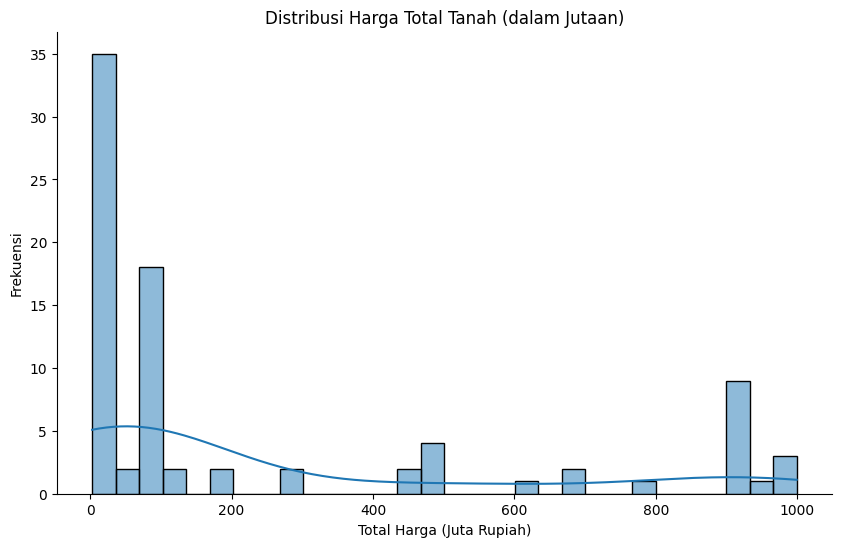

In [611]:
# Tampilkan distribusi Total_Price_Juta dari jutaan_df
plt.figure(figsize=(10, 6))
sns.histplot(jutaan_df['Total_Price_Juta'], kde=True, bins=30)
plt.title('Distribusi Harga Total Tanah (dalam Jutaan)')
plt.xlabel('Total Harga (Juta Rupiah)')
plt.ylabel('Frekuensi')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [612]:
# Tampilkan statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif untuk Kolom Numerik:")
display(merged_df[['Total_Price_Juta', 'Land_Area_m2', 'Price_per_meter_Juta']].describe())

Statistik Deskriptif untuk Kolom Numerik:


,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta
count,1.671000e+03,1671.000000,1671.000000
mean,4.431205e+07,2858.953321,652.924588
std,1.798921e+09,12750.668803,19672.023492
min,2.800000e+00,10.000000,0.000750
25%,4.300000e+03,250.000000,12.481304
50%,9.800000e+03,457.000000,20.000000
75%,2.800000e+04,1164.000000,27.500000
max,7.353600e+10,250000.000000,800000.000000


Distribusi Berdasarkan BreadcrumbList_ListItem_name_2 (dalam angka):
BreadcrumbList_ListItem_name_2
Jakarta Selatan    507
Jakarta Utara      443
Jakarta Barat      430
Jakarta Timur      216
Jakarta Pusat       75
Name: count, dtype: int64


/tmp/ipython-input-1508942630.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BreadcrumbList_ListItem_name_2', data=merged_df, order=merged_df['BreadcrumbList_ListItem_name_2'].value_counts().index, palette='viridis')


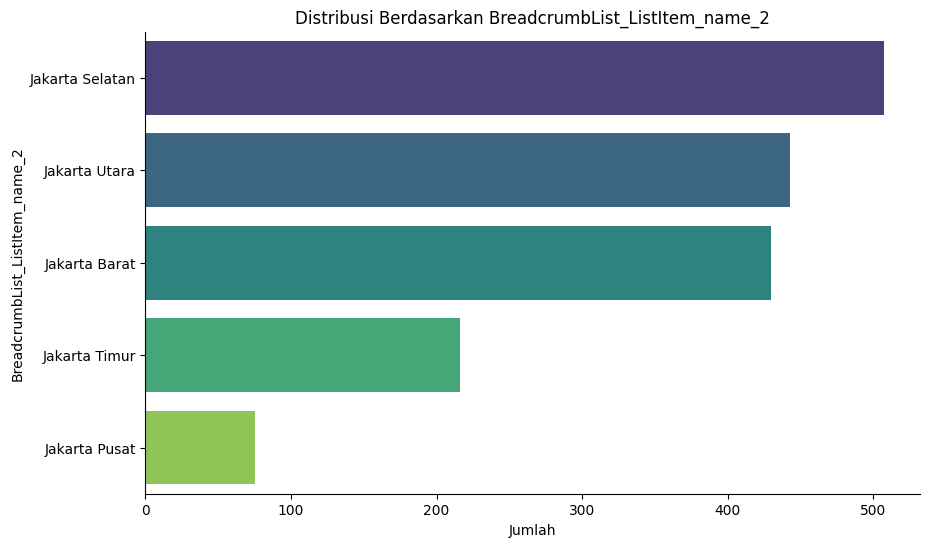

In [613]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung frekuensi setiap nilai di kolom 'BreadcrumbList_ListItem_name_2'
print("Distribusi Berdasarkan BreadcrumbList_ListItem_name_2 (dalam angka):")
print(merged_df['BreadcrumbList_ListItem_name_2'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y='BreadcrumbList_ListItem_name_2', data=merged_df, order=merged_df['BreadcrumbList_ListItem_name_2'].value_counts().index, palette='viridis')
plt.title('Distribusi Berdasarkan BreadcrumbList_ListItem_name_2')
plt.xlabel('Jumlah')
plt.ylabel('BreadcrumbList_ListItem_name_2')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

Distribusi Berdasarkan Certificate_0 (dalam angka):
Certificate_0
SHM               905
HGB               316
Lainnya           256
PPJB              174
Akta Jual Beli      9
Girik               5
Hak Pakai           4
HGU                 2
Name: count, dtype: int64


/tmp/ipython-input-446639547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Certificate_0', data=merged_df, order=merged_df['Certificate_0'].value_counts().index, palette='viridis')


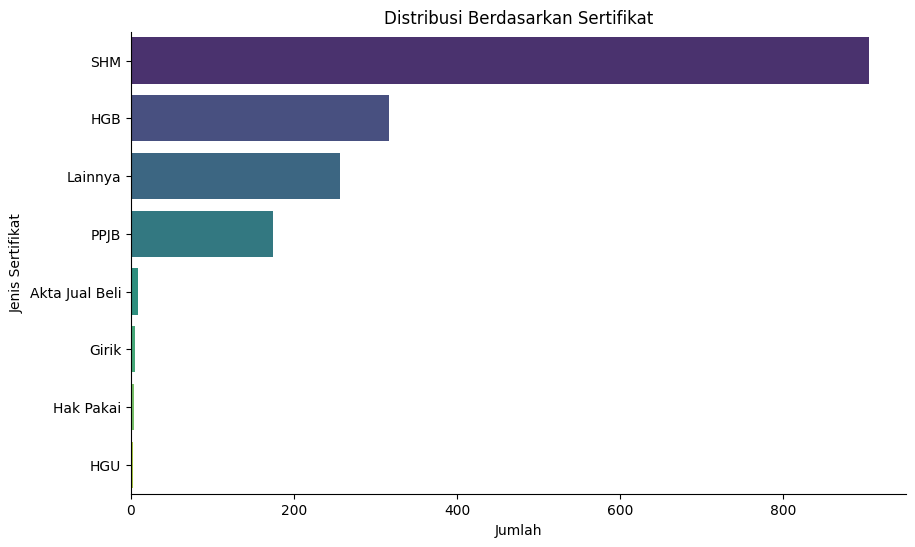

In [614]:
# Hitung frekuensi setiap nilai di kolom 'Certificate_0'
print("Distribusi Berdasarkan Certificate_0 (dalam angka):")
print(merged_df['Certificate_0'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y='Certificate_0', data=merged_df, order=merged_df['Certificate_0'].value_counts().index, palette='viridis')
plt.title('Distribusi Berdasarkan Sertifikat')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Sertifikat')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# **Modeling**

In [615]:
# Cell 15a: Normalisasi dan Transformasi Logaritmik untuk Model

print("📊 MEMPROSES NORMALISASI DAN TRANSFORMASI DATA...")

# 1. Transformasi logaritmik pada target (harga) untuk mengatasi skewness
merged_df['Log_Total_Price'] = np.log1p(merged_df['Total_Price_Juta'])
merged_df['Log_Price_per_meter'] = np.log1p(merged_df['Price_per_meter_Juta'])

print("✅ Transformasi logaritmik berhasil diterapkan")
print(f"Distribusi harga asli (skew): {merged_df['Total_Price_Juta'].skew():.2f}")
print(f"Distribusi harga log (skew): {merged_df['Log_Total_Price'].skew():.2f}")

# 2. Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler

# Kolom numerik yang akan dinormalisasi
numerical_features = ['Land_Area_m2', 'Log_Price_per_meter']

# Buat salinan untuk data yang dinormalisasi
df_normalized = merged_df.copy()

scaler = StandardScaler()
df_normalized[numerical_features] = scaler.fit_transform(df_normalized[numerical_features])

print("✅ Normalisasi fitur numerik berhasil")
print("Range nilai setelah normalisasi:")
print(df_normalized[numerical_features].describe())

# 3. Feature engineering untuk lokasi dan sertifikat
print("\n🔧 FEATURE ENGINEERING...")

# Gruping kategori sertifikat menjadi nilai kekuatan
certificate_strength = {
    'SHM': 1.0,
    'HGB': 0.8,
    'PPJB': 0.6,
    'Akta Jual Beli': 0.5,
    'Hak Pakai': 0.4,
    'Girik': 0.3,
    'HGU': 0.2,
    'Lainnya': 0.4
}

df_normalized['Certificate_Strength'] = df_normalized['Certificate_0'].map(certificate_strength)

# Target encoding untuk lokasi (menggunakan rata-rata log harga)
location_avg_price = df_normalized.groupby('BreadcrumbList_ListItem_name_2')['Log_Total_Price'].mean()
df_normalized['Location_Value'] = df_normalized['BreadcrumbList_ListItem_name_2'].map(location_avg_price)

print("✅ Feature engineering lokasi dan sertifikat berhasil")
print("Contoh nilai Location_Value:")
print(df_normalized[['BreadcrumbList_ListItem_name_2', 'Location_Value']].drop_duplicates().head(5))

# 4. Simpan data yang sudah diproses untuk modeling
final_df = df_normalized.copy()

# Hapus kolom yang tidak diperlukan untuk modeling
final_columns = [
    'NO', 'Log_Total_Price', 'Land_Area_m2', 'Log_Price_per_meter',
    'Certificate_Strength', 'Location_Value', 'BreadcrumbList_ListItem_name_2',
    'BreadcrumbList_ListItem_name_3'
]

final_df = final_df[final_columns]

print(f"\n✅ DATA SIAP UNTUK MODELING!")
print(f"Jumlah baris akhir: {len(final_df)}")
print(f"Kolom yang akan digunakan untuk modeling: {list(final_df.columns)}")

📊 MEMPROSES NORMALISASI DAN TRANSFORMASI DATA...
✅ Transformasi logaritmik berhasil diterapkan
Distribusi harga asli (skew): 40.88
Distribusi harga log (skew): 0.15
✅ Normalisasi fitur numerik berhasil
Range nilai setelah normalisasi:
       Land_Area_m2  Log_Price_per_meter
count  1.671000e+03         1.671000e+03
mean   1.488270e-17        -1.849707e-16
std    1.000299e+00         1.000299e+00
min   -2.235025e-01        -2.939634e+00
25%   -2.046743e-01        -3.892930e-01
50%   -1.884350e-01         4.536769e-02
75%   -1.329703e-01         3.448528e-01
max    1.938840e+01         1.038955e+01

🔧 FEATURE ENGINEERING...
✅ Feature engineering lokasi dan sertifikat berhasil
Contoh nilai Location_Value:
   BreadcrumbList_ListItem_name_2  Location_Value
0                   Jakarta Barat        9.017963
1                 Jakarta Selatan        9.617780
2                   Jakarta Timur        8.463896
3                   Jakarta Utara        9.593057
71                  Jakarta Pusat     

In [616]:
# Cell 15b: Handling Distribusi Tidak Seimbang

print("⚖️ MENANGANI DISTRIBUSI TIDAK SEIMBANG...")

# 1. Analisis distribusi lokasi saat ini
location_counts = final_df['BreadcrumbList_ListItem_name_2'].value_counts()
print("\nDistribusi lokasi saat ini:")
print(location_counts)
print(f"Rasio Jakarta Pusat vs Jakarta Selatan: {location_counts.get('Jakarta Pusat', 0) / location_counts.get('Jakarta Selatan', 1):.3f}")

# 2. Strategi: Stratified Sampling untuk pembagian data
# (Akan diterapkan saat pembagian training-test di cell berikutnya)

# 3. Jika diperlukan, teknik oversampling untuk kelas minoritas
# (Hanya jika jumlah data Jakarta Pusat sangat sedikit < 50 baris)
jakpus_count = location_counts.get('Jakarta Pusat', 0)

if jakpus_count < 50 and jakpus_count > 0:
    print(f"\n⚠️ Jakarta Pusat hanya memiliki {jakpus_count} data. Mempertimbangkan oversampling...")

    # Identifikasi data minoritas
    minor_df = final_df[final_df['BreadcrumbList_ListItem_name_2'] == 'Jakarta Pusat']
    majority_df = final_df[final_df['BreadcrumbList_ListItem_name_2'] != 'Jakarta Pusat']

    # Jika data minoritas cukup untuk SMOTE
    if len(minor_df) >= 6:
        from imblearn.over_sampling import SMOTE

        # Siapkan data untuk SMOTE
        X = final_df[['Land_Area_m2', 'Log_Price_per_meter', 'Certificate_Strength', 'Location_Value']]
        y = (final_df['BreadcrumbList_ListItem_name_2'] == 'Jakarta Pusat').astype(int)

        # Terapkan SMOTE hanya untuk prediksi lokasi (optional)
        smote = SMOTE(sampling_strategy='minority', random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        print(f"✅ SMOTE berhasil diterapkan")
        print(f"Jumlah data sebelum: {len(final_df)}")
        print(f"Jumlah data setelah oversampling: {len(X_resampled)}")
    else:
        print("ℹ️ Data Jakarta Pusat terlalu sedikit untuk oversampling. Menggunakan strategi lain.")
else:
    print("✅ Distribusi lokasi cukup seimbang untuk modeling")


⚖️ MENANGANI DISTRIBUSI TIDAK SEIMBANG...

Distribusi lokasi saat ini:
BreadcrumbList_ListItem_name_2
Jakarta Selatan    507
Jakarta Utara      443
Jakarta Barat      430
Jakarta Timur      216
Jakarta Pusat       75
Name: count, dtype: int64
Rasio Jakarta Pusat vs Jakarta Selatan: 0.148
✅ Distribusi lokasi cukup seimbang untuk modeling


In [617]:
from sklearn.preprocessing import MinMaxScaler
scaler_cert = MinMaxScaler()
df_normalized['Certificate_Strength'] = scaler_cert.fit_transform(
    df_normalized[['Certificate_Strength']]
)

In [618]:
# Tampilkan statistik deskriptif untuk kolom numerik yang sudah diproses
print("📊 Statistik Deskriptif Akhir (untuk kolom numerik yang akan dimodelkan):")
display(final_df[['Log_Total_Price', 'Land_Area_m2', 'Log_Price_per_meter', 'Certificate_Strength', 'Location_Value']].describe())

# Periksa missing value pada kolom yang akan digunakan untuk modeling
modeling_columns = ['Log_Total_Price', 'Land_Area_m2', 'Log_Price_per_meter', 'Certificate_Strength', 'Location_Value']
print("\n✅ Memeriksa Missing Values pada Kolom Modeling:")
print(final_df[modeling_columns].isnull().sum())

# Tampilkan info dataFrame akhir
print("\nℹ️ Info DataFrame Akhir:")
final_df.info()

print("\n🎉 DATA SIAP UNTUK MODELING!")

📊 Statistik Deskriptif Akhir (untuk kolom numerik yang akan dimodelkan):


,Log_Total_Price,Land_Area_m2,Log_Price_per_meter,Certificate_Strength,Location_Value
count,1671.000000,1.671000e+03,1.671000e+03,1671.000000,1671.000000
mean,9.311929,1.488270e-17,-1.849707e-16,0.821424,9.311929
std,1.947084,1.000299e+00,1.000299e+00,0.227947,0.414495
min,1.335001,-2.235025e-01,-2.939634e+00,0.200000,8.463896
25%,8.366603,-2.046743e-01,-3.892930e-01,0.600000,9.017963
50%,9.190240,-1.884350e-01,4.536769e-02,1.000000,9.593057
75%,10.239996,-1.329703e-01,3.448528e-01,1.000000,9.617780
max,25.021041,1.938840e+01,1.038955e+01,1.000000,9.711589



✅ Memeriksa Missing Values pada Kolom Modeling:
Log_Total_Price         0
Land_Area_m2            0
Log_Price_per_meter     0
Certificate_Strength    0
Location_Value          0
dtype: int64

ℹ️ Info DataFrame Akhir:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NO                              1671 non-null   int64  
 1   Log_Total_Price                 1671 non-null   float64
 2   Land_Area_m2                    1671 non-null   float64
 3   Log_Price_per_meter             1671 non-null   float64
 4   Certificate_Strength            1671 non-null   float64
 5   Location_Value                  1671 non-null   float64
 6   BreadcrumbList_ListItem_name_2  1671 non-null   object 
 7   BreadcrumbList_ListItem_name_3  1671 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 104.6+ KB

🎉

In [619]:
# Pilih kolom numerik untuk pemeriksaan outlier
numerical_cols = ['Total_Price_Juta', 'Land_Area_m2', 'Price_per_meter_Juta']

print("🔎 MEMERIKSA OUTLIER MENGGUNAKAN METODE IQR...")

outlier_indices = {}

for col in numerical_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Batas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    # Menggunakan .index.tolist() untuk mendapatkan list index
    outliers = merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)].index.tolist()
    outlier_indices[col] = outliers

    print(f"\n--- Kolom: {col} ---")
    print(f"  Q1: {Q1:,.2f}")
    print(f"  Q3: {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Batas Bawah (IQR): {lower_bound:,.2f}")
    print(f"  Batas Atas (IQR): {upper_bound:,.2f}")
    print(f"  Jumlah Outlier: {len(outliers)}")
    # Tampilkan beberapa contoh index outlier jika ada
    if len(outliers) > 0:
        print(f"  Contoh Index Outlier: {outliers[:10]}...") # Tampilkan maksimal 10 index

# REKOMENDASI PENAMBAHAN (Cell 15c)
print("\n🔍 HANDLING OUTLIERS...")

# Deteksi outliers menggunakan IQR method
Q1 = df_normalized['Log_Total_Price'].quantile(0.25)
Q3 = df_normalized['Log_Total_Price'].quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outliers ekstrem (> 3 IQR)
extreme_outliers_mask = (
    (df_normalized['Log_Total_Price'] < (Q1 - 3 * IQR)) |
    (df_normalized['Log_Total_Price'] > (Q3 + 3 * IQR))
)
extreme_outliers = df_normalized[extreme_outliers_mask]

print(f"Jumlah outliers ekstrem: {len(extreme_outliers)} ({len(extreme_outliers)/len(df_normalized):.1%})")

# Terapkan winsorizing jika ada outliers ekstrem
if len(extreme_outliers) > 0 and len(extreme_outliers) < len(df_normalized)*0.05:
    from scipy.stats.mstats import winsorize
    df_normalized['Log_Total_Price'] = winsorize(
        df_normalized['Log_Total_Price'].values,
        limits=[0.01, 0.01]
    )
    print("✅ Winsorizing diterapkan untuk outliers ekstrem")
print("\n💡 Catatan:")
print("  - Outlier yang terdeteksi menggunakan metode IQR ini adalah kandidat untuk penanganan.")
print("  - Keputusan untuk menghapus atau mentransformasi outlier bergantung pada konteks analisis.")



🔎 MEMERIKSA OUTLIER MENGGUNAKAN METODE IQR...

--- Kolom: Total_Price_Juta ---
  Q1: 4,300.00
  Q3: 28,000.00
  IQR: 23,700.00
  Batas Bawah (IQR): -31,250.00
  Batas Atas (IQR): 63,550.00
  Jumlah Outlier: 245
  Contoh Index Outlier: [7, 14, 23, 24, 48, 58, 69, 81, 94, 98]...

--- Kolom: Land_Area_m2 ---
  Q1: 250.00
  Q3: 1,164.00
  IQR: 914.00
  Batas Bawah (IQR): -1,121.00
  Batas Atas (IQR): 2,535.00
  Jumlah Outlier: 250
  Contoh Index Outlier: [1, 7, 22, 23, 44, 48, 57, 58, 81, 94]...

--- Kolom: Price_per_meter_Juta ---
  Q1: 12.48
  Q3: 27.50
  IQR: 15.02
  Batas Bawah (IQR): -10.05
  Batas Atas (IQR): 50.03
  Jumlah Outlier: 99
  Contoh Index Outlier: [58, 82, 92, 98, 100, 135, 144, 147, 151, 182]...

🔍 HANDLING OUTLIERS...
Jumlah outliers ekstrem: 20 (1.2%)
✅ Winsorizing diterapkan untuk outliers ekstrem

💡 Catatan:
  - Outlier yang terdeteksi menggunakan metode IQR ini adalah kandidat untuk penanganan.
  - Keputusan untuk menghapus atau mentransformasi outlier bergantung pa

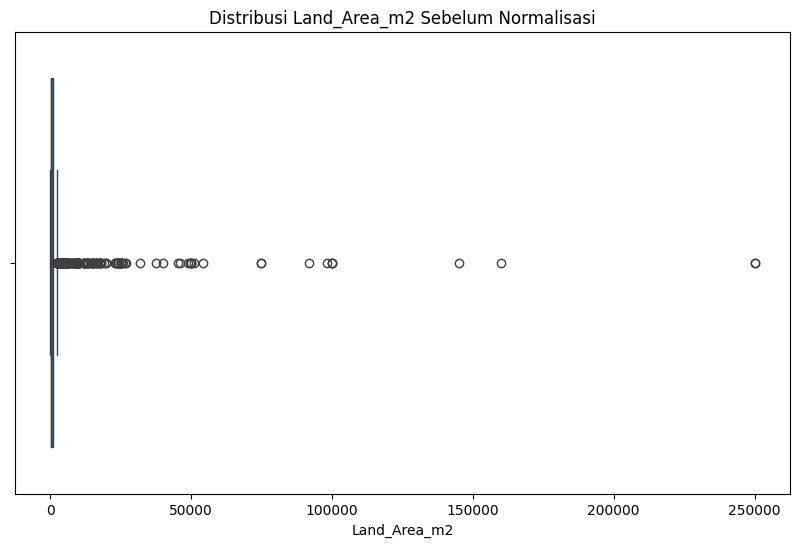

In [620]:
# Tambahkan visualisasi untuk Land_Area_m2
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['Land_Area_m2'])
plt.title('Distribusi Land_Area_m2 Sebelum Normalisasi')
plt.savefig('/content/drive/MyDrive/Rumah123_dataset/land_area_boxplot.png')
plt.show()

In [621]:
# REKOMENDASI PENAMBAHAN (Cell 15d)
print("\n VISUALISASI DAN STATISTIK DISTRIBUSI...")

# Tampilkan statistik deskriptif sebelum transformasi
print("\nStatistik Deskriptif Harga Asli:")
display(merged_df['Total_Price_Juta'].describe())

# Tampilkan statistik deskriptif setelah transformasi log
print("\nStatistik Deskriptif Log Harga:")
display(df_normalized['Log_Total_Price'].describe())




 VISUALISASI DAN STATISTIK DISTRIBUSI...

Statistik Deskriptif Harga Asli:


,Total_Price_Juta
count,1.671000e+03
mean,4.431205e+07
std,1.798921e+09
min,2.800000e+00
25%,4.300000e+03
50%,9.800000e+03
75%,2.800000e+04
max,7.353600e+10



Statistik Deskriptif Log Harga:


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Log_Total_Price
count,1671.000000
mean,9.294380
std,1.843702
min,2.944439
25%,8.366603
50%,9.190240
75%,10.239996
max,14.613018


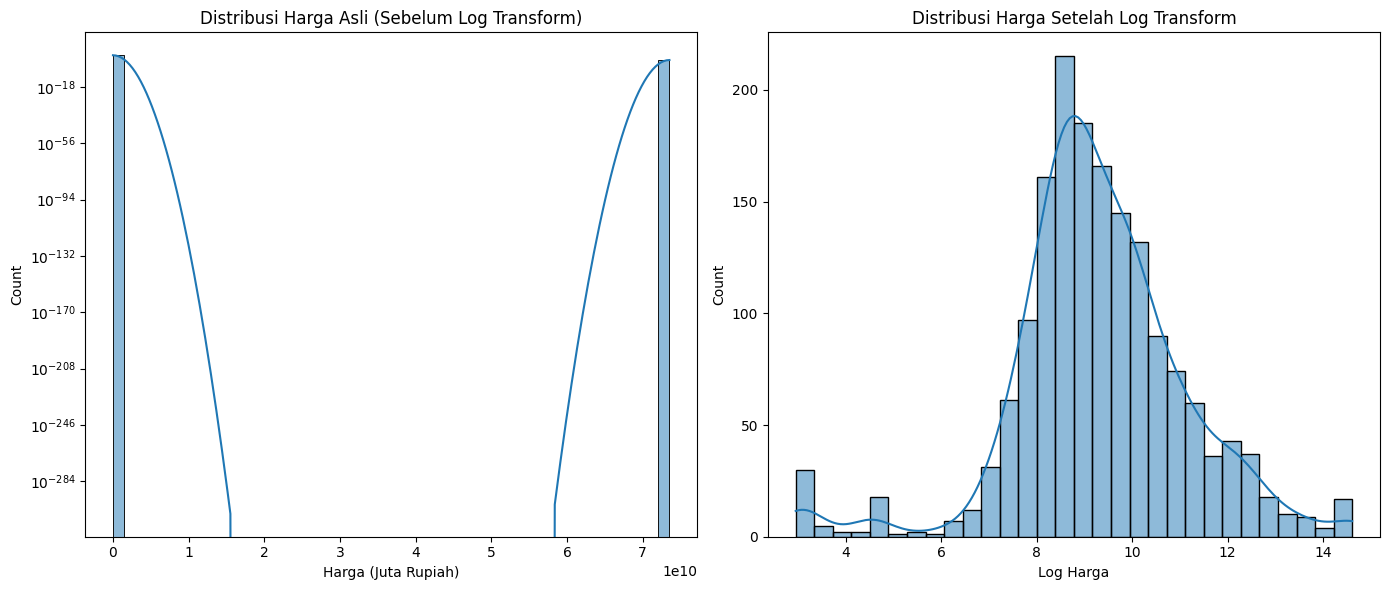

In [622]:
plt.figure(figsize=(14, 6))

# Sebelum transformasi
plt.subplot(1, 2, 1)
sns.histplot(merged_df['Total_Price_Juta'], bins=50, kde=True)
plt.title('Distribusi Harga Asli (Sebelum Log Transform)')
plt.xlabel('Harga (Juta Rupiah)')
plt.yscale('log')  # log scale untuk visualisasi yang lebih baik

# Setelah transformasi
plt.subplot(1, 2, 2)
sns.histplot(df_normalized['Log_Total_Price'], bins=30, kde=True)
plt.title('Distribusi Harga Setelah Log Transform')
plt.xlabel('Log Harga')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Rumah123_dataset/distribusi_harga.png')
plt.show()

In [623]:
# REKOMENDASI PENAMBAHAN (Cell 15e)
print("\n🚀 ADVANCED FEATURE ENGINEERING...")

# 1. Premium location indicator
premium_areas = ['Menteng', 'Kebayoran Baru', 'Senopati', 'Pondok Indah','Puri Indah' ,'Kelapa Gading' ,
                'Permata Hijau','Pulomas','Dharmawangsa', 'Pantai Indah Kapuk','Pantai Indah Kapuk 2','Kembangan' ,'Sudirman','Dukuh Atas' ,'Kemang', 'Setiabudi', 'SCBD']
df_normalized['Is_Premium_Area'] = df_normalized['BreadcrumbList_ListItem_name_3'].isin(premium_areas).astype(int)

# 2. Area size category
df_normalized['Area_Category'] = pd.qcut(df_normalized['Land_Area_m2'],
                                        q=4,
                                        labels=['Small', 'Medium', 'Large', 'Extra Large'])

# 3. Price to location ratio (menangkap harga relatif per lokasi)
location_median_price = df_normalized.groupby('BreadcrumbList_ListItem_name_2')['Log_Total_Price'].transform('median')
df_normalized['Price_to_Location_Ratio'] = df_normalized['Log_Total_Price'] / location_median_price

print("✅ Advanced feature engineering berhasil!")


🚀 ADVANCED FEATURE ENGINEERING...
✅ Advanced feature engineering berhasil!


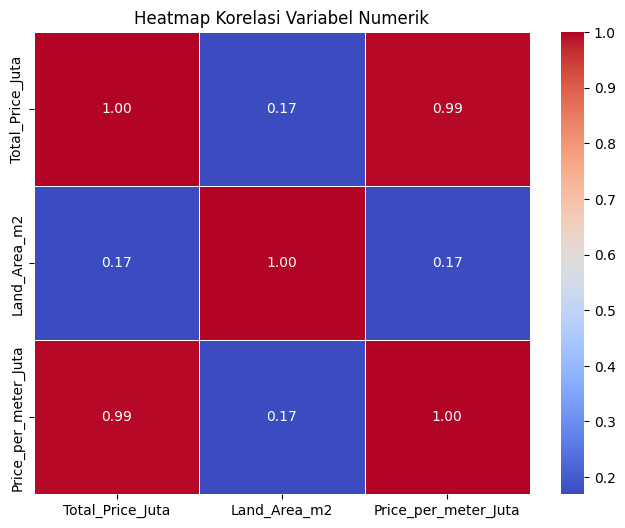

In [624]:
# Pilih kolom numerik untuk analisis korelasi
# Menggunakan kolom yang sudah dinormalisasi/diubah ('Total_Price_Juta', 'Land_Area_m2', 'Price_per_meter_Juta')
numerical_cols = ['Total_Price_Juta', 'Land_Area_m2', 'Price_per_meter_Juta']
correlation_matrix = merged_df[numerical_cols].corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

In [625]:

# 4. Pisahkan fitur dan target untuk modeling
X = final_df[['Land_Area_m2', 'Log_Price_per_meter', 'Certificate_Strength', 'Location_Value']]
y = final_df['Log_Total_Price']

print(f"\n✅ PERSIAPAN MODELING SELESAI")
print(f"Dimensi fitur (X): {X.shape}")
print(f"Dimensi target (y): {y.shape}")

# Simpan data untuk cell berikutnya
import pickle
with open('/content/drive/MyDrive/Rumah123_dataset/preprocessed_data.pkl', 'wb') as f:
    pickle.dump((X, y, final_df), f)

print("💾 Data preprocessed berhasil disimpan untuk modeling")


✅ PERSIAPAN MODELING SELESAI
Dimensi fitur (X): (1671, 4)
Dimensi target (y): (1671,)
💾 Data preprocessed berhasil disimpan untuk modeling
